#### Question 1

##### Please explain the technique of Gaussian Mixture and how it is used for anomaly detection.

Anomaly detection using GMM involves identifying data points with low probabilities. If a data point has a significantly lower probability of being generated by the mixture model compared to most other data points, it is considered an anomaly (this will output of a high anomaly score).

##### Please draw the diagram of Convolutional Neural Networks (CNN). Then explain the functionality of each layer of CNN. Name several latest algorithms of CNN (e.g., AlexNet etc.).

<b> Input (Shape: 32x32x3) </b>     
Conv2D(32, (3, 3), activation='relu', padding='same')  

        |
        v
<b> BatchNormalization </b>  
MaxPooling2D((2, 2))  

        |
        v
Conv2D(64, (3, 3), activation='relu', padding='same')  

        |
        v
<b> Residual </b>  
Residual(64, (3, 3))

        |
        v
<b> Flatten </b>  
Dense(512, activation='relu')  

        |
        v
<b> BatchNormalization </b>  
Dropout(0.5)  

        |
        v
Dense(10, activation='softmax')

        |
        v
<b> Output </b>  

This is a convolution neural network used to extract features from input images. This is a real example that was used to Convolutional operations capture spatial hierarchies of patterns, enabling the network to learn local features and their spatial relationships.

ReLU Activation: The Rectified Linear Unit (ReLU) activation function is used after each convolutional layer. ReLU introduces non-linearity into the model, helping it learn complex relationships in the data.

Batch Normalization: Batch normalization is applied after convolutional layers to stabilize and speed up the training process. 
Residual: Residual learning are added to the network to  the training of the neural networks. 

Max Pooling: Max-pooling layers downsample the feature maps, reducing their spatial dimensions.

Flattening: After the convolutional layers, the feature maps are flattened into a one-dimensional vector before passing through the fully connected layers.

Dense Layers: Fully connected dense layers are added after flattening to perform classification based on the extracted features.

Dropout: Dropout regularization is applied to the dense layers to prevent overfitting

Softmax Activation: The final layer uses the softmax activation function to produce class probabilities for multi-class classification tasks. 

##### What are the vanishing and exploding gradients problems in Backpropagation? Name several techniques to address these problems.

The explosion of an exploding gradient problem occurs when there is  exponential growth in the model. This is caused by the graidents repeatedly multipluing through the layers and end up with values larger than 1.0.

An example is a process called Rectified Linear Unit (ReLU) activation function which helps mitigate the vanishing gradient problem or batch normalization which normalizes the batches and reduce the gradients.

#### Question 2

##### Consider a learned hypothesis, h, for some Boolean concept. When h is tested on a set of 100 examples, it classifies 80 correctly. What is the 95% confidence interval for the true error rate for Error<sub>D</sub>(h)?

Z-N(95%) = 1.96  
Error = Z<sub>c</sub> * $\sqrt{0.2(1-.2) / 100}$ = 0.0784

 = 0.20 &plusmn; 0.0784  
 = 0.1216, 0.2784
 
 Error<sub>D</sub>(h) = (0.1216, 0.2784)

#### Question 3) 

#### Consider a learned hypothesis, h, for some Boolean concept. When h is tested on a set of 100 examples, it classifies 80 correctly. What is the 95% confidence interval for the true error rate for ErrorD(h)?

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import random
import numpy as np
from heapq import nsmallest
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import mean_squared_error 

/var/folders/2c/db_0lrw50h16d5cqvl89fg3c0000gn/T/ipykernel_7707/2067190028.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


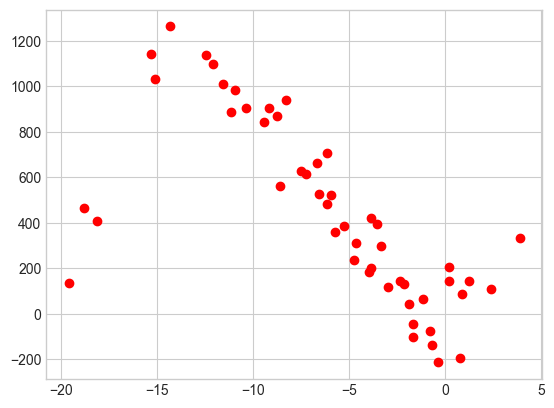

In [2]:
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro')

In [3]:
def plot_data_and_polynomial(x, y, coefficients, title):
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = np.polyval(coefficients, x_fit)
    
    plt.figure()
    plt.plot(x, y, 'ro', label='Noisy Data')
    plt.plot(x_fit, y_fit, label=title)
    plt.title(title)
    plt.legend()
    plt.show()

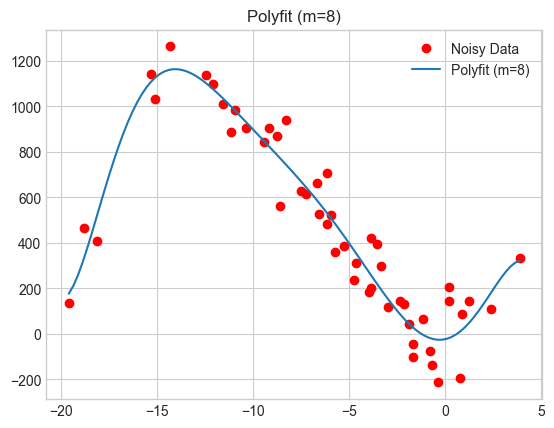

In [4]:
coefficients = np.polyfit(x.flatten(), y.flatten(), 8)
plot_data_and_polynomial(x, y, coefficients, f'Polyfit (m={8})')

In [5]:
coefficients = np.polyfit(x.flatten(), y.flatten(), 8)
y_pred = np.polyval(coefficients, x.flatten())
mse_value = mean_squared_error(y,y_pred)
print(f'The MSE is {mse_value}.')

The MSE is 10993.073096196491.


#### GA Algorithm

In [6]:
mutation_rate=0.1
crossover_rate=0.5

 The best solution found:                                                                           
 [ 0.95742359 19.12317081  0.4194842   1.01223253]

 Objective function:
 12216.398207222945


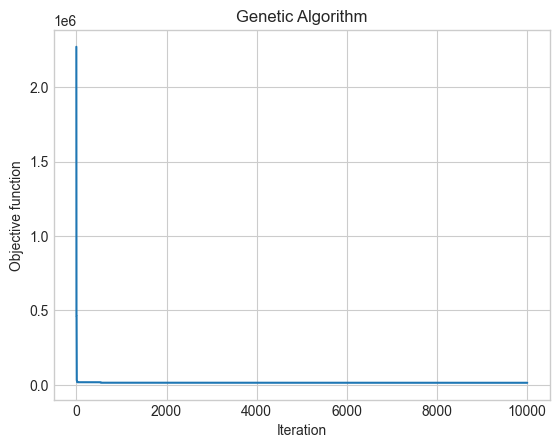

In [7]:
def polynomial_fitness(coeffs):
    poly = np.poly1d(coeffs)
    y_pred = poly(x)
    mse = np.mean((y - y_pred)**2)
    return mse

coeff_bounds = np.array([[-30,30]] * 4)

algorithm_param = {'max_num_iteration': 10000,\
                   'population_size':150,\
                   'mutation_probability':mutation_rate,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': crossover_rate,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model = ga(function=polynomial_fitness, dimension=4, variable_type='real', variable_boundaries=coeff_bounds, algorithm_parameters=algorithm_param)
model.run()

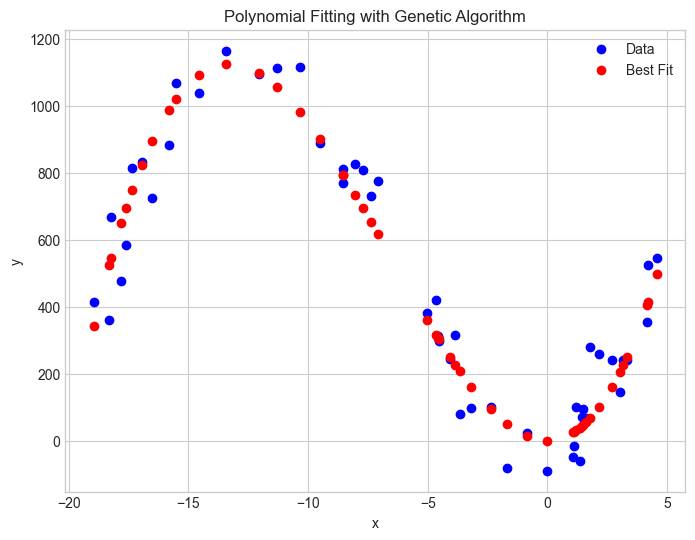

In [8]:
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

res = model.best_variable
fit=np.poly1d(res)
y_pred_ga = fit(x)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.scatter(x, y_pred_ga, color='red', label='Best Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fitting with Genetic Algorithm')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
mse_best_fit = np.mean((y - y_pred_ga) ** 2)
print("Mean Squared Error of the GA Model:", mse_best_fit)
print("Mean Squared Error of the Polyfit Model:", mse_value)

Mean Squared Error of the GA Model: 8072.221275104751
Mean Squared Error of the Polyfit Model: 10993.073096196491


#### Results
Judging by both models, we see that the GA model has a slightly better MSE versus the original polynomial model

Mean Squared Error of the GA Model: 8072.221275104751  
Mean Squared Error of the Polyfit Model: 10993.073096196491